### Multiple Linear Regression

1. Strength of the effect of independent variables on dependent variable.
2. Understand how the dependent variable changes when the independent variable change. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB","CO2EMISSIONS" ]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


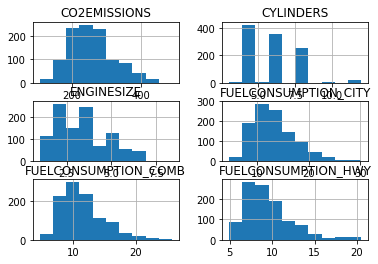

In [4]:
cdf.hist()
plt.show()

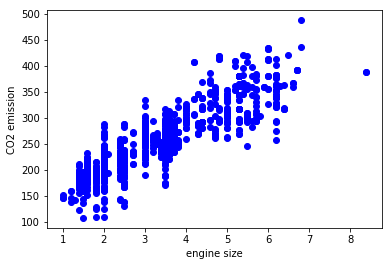

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "blue")
plt.xlabel("engine size")
plt.ylabel("CO2 emission")
plt.show()

In [6]:
mask = np.random.rand(len(df))  <0.8
train = cdf[mask]
test  = cdf[~mask]

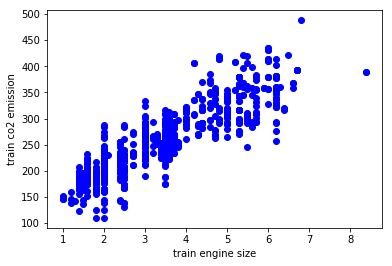

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.xlabel("train engine size")
plt.ylabel("train co2 emission")
plt.show()

In [9]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

x = np.asanyarray(train[["ENGINESIZE", "FUELCONSUMPTION_COMB", "CYLINDERS"]])
y = np.asanyarray(train[["CO2EMISSIONS"]])

regr.fit(x,y)

print ("The co-efficients of the Linear Model are ", regr.coef_)

The co-efficients of the Linear Model are  [[10.78960697  9.3593395   7.90933134]]


In [10]:
print ("The intercept is ", regr.intercept_)

The intercept is  [65.63712853]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

In [11]:
y_hat = regr.predict(test[["ENGINESIZE", "FUELCONSUMPTION_COMB", "CYLINDERS"]])

x_test = np.asanyarray(test[["ENGINESIZE", "FUELCONSUMPTION_COMB", "CYLINDERS"]])
y_test = np.asanyarray(test["CO2EMISSIONS"])

print("Residual sum of squares", np.mean((y_hat-y_test)**2))

print("Varience score ", regr.score(x_test, y_test))

Residual sum of squares 6204.403392445855
Varience score  0.8672452056631165


__explained "variance regression" score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

**Try to use a multiple linear regression with the same dataset but this time use __FUEL CONSUMPTION in CITY__ and 
__FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB